In [61]:
# Importamos todas las librerías que necesitamos

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [62]:
# Importamos el dataset

data = pd.read_csv(r'Churn.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [63]:
# Imprimimos un .info() para analizar de manera general las columnas del dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Conclusiones Iniciales**

- Tenemos un dataset con un total de 14 columnas y 1000 filas.
- El D-type de cada columna parece corresponder de manera correcta a los valores que contienen.
- Tenemos varias columnas numéricas y algunas categóricas. Esto significa que tendremos que codificar y estandarizar estos datos - para poder hacer nuestros modelos. 
- Tenemos valores nulos en la columna `Tenure`. Vamos a necesitar que arreglar este problema.

### Valores Ausentes


In [64]:
# Cuantos valores nulos tenemos en la columna Tenure?

data['Tenure'].isna().sum()

909

In [65]:
# Cual es el porcentaje de valores ausentes con respecto a todo el dataset?

'{:.2%}'.format(data['Tenure'].isna().sum() / len(data))

'9.09%'

**Conclusión Valores Ausentes**

El porcentaje de valores ausentes es poco. Y ya que no tenemos manera de saber cómo la métrica de esta columna es calculada, vamos a deshacernos de estos valores. 

In [66]:
# Nos deshacemos de los valores nulos y comprobamos

data_updated = data[data['Tenure'] >= 0 ]
data_updated['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0.])

### Duplicados

In [67]:
# Analizamos cuantos duplicados tenemos en cada columna 

columns = data_updated.columns
for column in columns:
    duplicates = data_updated[column].duplicated().sum()
    print (str(column), duplicates)

RowNumber 0
CustomerId 0
Surname 6304
CreditScore 8633
Geography 9088
Gender 9089
Age 9021
Tenure 9080
Balance 3284
NumOfProducts 9087
HasCrCard 9089
IsActiveMember 9089
EstimatedSalary 1
Exited 9089


In [68]:
# Imprimimos los valores únicos de cada columna para corroborar nuestros duplicados.  

for column in columns:
    duplicates = data_updated[column].unique()
    print (duplicates)

[   1    2    3 ... 9997 9998 9999]
[15634602 15647311 15619304 ... 15569892 15584532 15682355]
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 533 553 520 722 475 490 804
 582 472 465 556 834 660 776 829 637 698 788 601 656 725 511 614 687 555
 603 751 581 735 661 675 738 813 657 604 519 664 678 757 416 665 777 506
 493 750 729 646 647 808 524 769 515 773 814 710 623 670 622 785 605 479
 685 562 721 628 668 828 674 625 770 758 795 686 789 589 461 584 579 663
 682 793 691 485 650 754 535 716 539 706 586 631 717 683 704 615 667 484
 480 512 606 597 778 514 730 525 715 580 807 521 759 516 711 550 618 643
 671 689 620 676 572 695 592 694 547 594 673 610 767 585 763 712 703 662
 659 523 772 545 634 739 771 681 544 766 727 557 531 498 651 791 733 811
 707 714 782 775 799 744 588 747 583 627 731 629 438 652 642 806 474 559
 429 680 749 734 644 626 649 805 543

**Conclusión Duplicados**

En nuestro primer bucle vemos que tenemos varias columnas con duplicados. Sin embargo, esto no es del todo cierto. Vemos que la columna `CustomerId` no tiene duplicados, por lo tanto, podemos estar seguros que cada fila pertenece a un cliente diferente. 

El resto de datos es normal que puedan ser repetidos ya que la edad, genero, etc. Pueden ser iguales entre diferentes clientes. 
Para estar seguros de que no teníamos otros valores extraños en las columnas, hicimos nuestro segundo bucle y no encontramos valores diferentes o anormales en los valores únicos de cada columna.  


### Outliers

In [69]:
def outliers(df,col,ylabel):
    df.boxplot(col,figsize=(8,5))
    plt.title('Boxplot of ' + col)
    plt.ylabel(ylabel)
    plt.show()

    min = df[col].min()
    values_0 = len(df[df[col] <= 0])
    percentage_values_0 = '{:.2%}'.format(len(df[df[col] <= 0])/len(df))

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    up_limit = Q3 + IQR
    low_limit = Q1 - IQR

    values_up_limit = len(df[df[col] >= up_limit])
    values_low_limit = len(df[df[col] <= low_limit])

    percentage_up_limit = '{:.2%}'.format(len(df[df[col] >= up_limit])/len(df))
    percentage_low_limit = '{:.2%}'.format(len(df[df[col] <= low_limit])/len(df))

    print(df[col].describe())
    print()
    print(f'El IQR de {col} es {IQR}')
    print()

    if low_limit < 0:
        print(f'La cantidad de valores iguales o menores a {min} es {values_0}')
        print()
        print(f'El porcentaje de valores iguales o menores a {min} es {percentage_values_0}')
    else:
        print(f'La cantidad de valores iguales o menores a {low_limit} es {values_low_limit}')
        print()
        print(f'El porcentaje de valores iguales o menores a {low_limit} es {percentage_low_limit}')

    print()
    print(f'EL limite superior es de nuestro boxplot es {up_limit}')
    print()
    print(f'La cantidad de volores iguales o superiores a {up_limit} es {values_up_limit}')
    print()
    print(f'Elporcentaje de valores iguales o superiores a {up_limit} es {percentage_up_limit}')

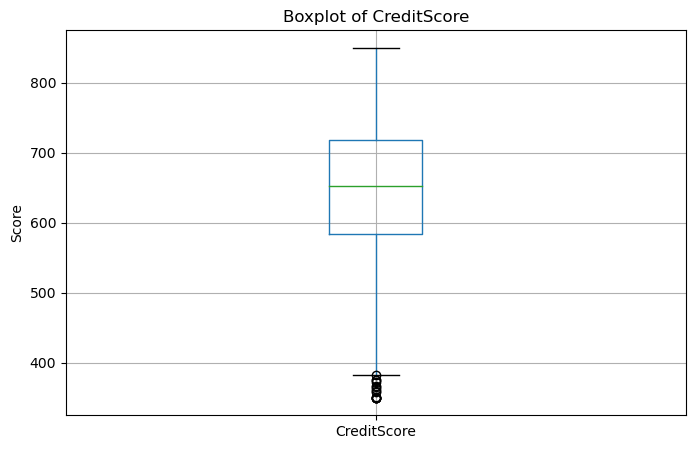

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

El IQR de CreditScore es 134.0

La cantidad de valores iguales o menores a 450.0 es 189

El porcentaje de valores iguales o menores a 450.0 es 1.89%

EL limite superior es de nuestro boxplot es 852.0

La cantidad de volores iguales o superiores a 852.0 es 0

Elporcentaje de valores iguales o superiores a 852.0 es 0.00%


In [70]:
outliers(data,'CreditScore','Score')

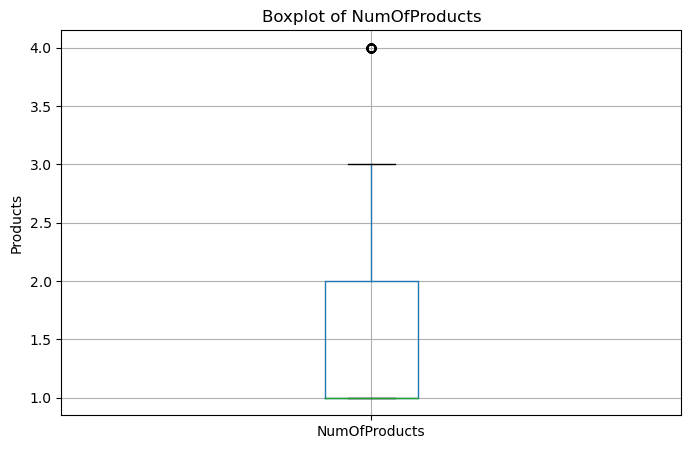

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

El IQR de NumOfProducts es 1.0

La cantidad de valores iguales o menores a 0.0 es 0

El porcentaje de valores iguales o menores a 0.0 es 0.00%

EL limite superior es de nuestro boxplot es 3.0

La cantidad de volores iguales o superiores a 3.0 es 326

Elporcentaje de valores iguales o superiores a 3.0 es 3.26%


In [71]:
outliers(data,'NumOfProducts','Products')

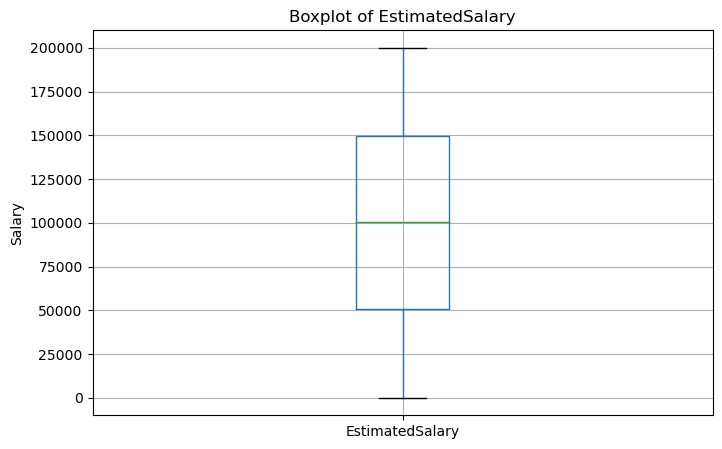

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

El IQR de EstimatedSalary es 98386.1375

La cantidad de valores iguales o menores a 11.58 es 0

El porcentaje de valores iguales o menores a 11.58 es 0.00%

EL limite superior es de nuestro boxplot es 247774.385

La cantidad de volores iguales o superiores a 247774.385 es 0

Elporcentaje de valores iguales o superiores a 247774.385 es 0.00%


In [72]:
outliers(data,'EstimatedSalary','Salary')

**Conclusiones Outliers**

Solo tomamos las columnas ` CreditScore `, ` NumOfProducts`, y ` EstimatedSalary` para analizar los outliers ya que no vemos necesario hacerlo en las demás columnas. 

En la columna ` CreditScore ` vemos que tenemos un 1.89% de los datos que podrían ser considerados outliers por ser menores que nuestro límite inferior del diagrama de caja. 

En nuestra columna ` NumOfProducts ` tenemos un 3.26% que puede ser considerado outliers por ser mayores que nuestro límite superior del diagrama de cajas. 

Nuestra columna ` EstimatedSalary` no tiene outliers.  

No tomaremos ninguna acción respecto a los outliers por el momento ya que consideramos necesario todos los valores de las columnas para realizar nuestros modelos. 

## Creacion de Modelos

### Análisis

Haremos lo siguiente:

- Crearemos una función para el análisis de la curva AUC-ROC
- Dividiremos nuestro dataset en conjuntos de características y objetivos.
- Dividiremos nuestros conjuntos de características y objetivos en conjuntos de entrenamiento y validación. Los conjuntos de validación serán un 25% de los conjuntos de entrenamiento ya que necesitamos la mayor cantidad de datos para poder entrenar a cada uno de nuestros modelos. 
- Analizaremos la creación de los modelos sin hacer la estandarización y codificación de nuestras columnas con valores categóricos. 


In [73]:
# Creamos nuestra función para el análisis de  la curva AUC-ROC

def get_roc_plot_data(y, predictions):
    fpr, tpr, _ = roc_curve(y,
                            predictions,
                            pos_label=None,
                            drop_intermediate=True)
    auc = round(roc_auc_score(y, predictions), 5)

    return fpr, tpr, auc


def plot_roc(custom_axis, y, predictions):

    multiple_curves = isinstance(y, dict)

    custom_axis.axis([-0.01,1.01,0,1.01])
    custom_axis.set(xlabel="False Positive Rate", ylabel="Recall")
    custom_axis.set_title("ROC Curve")

    if not multiple_curves:
        fpr, tpr, auc = get_roc_plot_data(y, predictions)

        custom_axis.plot(fpr, tpr)
        custom_axis.text(0.65, 0.02, 'AUC: ' + str(auc), fontsize=12)
    else:
        for i in range(len(y)):
            model = list(y.keys())[i]
            fpr, tpr, auc = get_roc_plot_data(y[model], predictions[model])

            custom_axis.plot(fpr, tpr, label=model)
            custom_axis.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
            custom_axis.text(0.50, 0.02 + i*0.1, f"{model} AUC: {str(auc)}", fontsize=12)

    custom_axis.plot([0,1],[0,1])

    return []

In [74]:
# Dividimos nuestro dataset en características y  objetivo. 

features = data_updated.drop(['Exited'], axis=1)
target = data_updated['Exited']

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size = 0.25, random_state = 12345)

In [75]:
# Intentamos entrenar nuestro modelo sin estandarizar o codificar las variables categóricas 

model = DecisionTreeClassifier()
try:
    model.fit(features_train, target_train)
    print('Entrenado')
except:
    print('No es posible entrenar el modelo')

No es posible entrenar el modelo


**Conclusiones Iniciales**

Vemos que nuestro modelo no ha podido ser entrenado. Esto se debe a que no puede procesar las variables categóricas que tenemos. Para arreglar el problema haremos lo siguiente:

- Utilizaremos el método OHE para codificar estas variables. 
- Además, utilizaremos el método StandardScaler para realizar el escalado de características.


In [76]:
# Utilizamos el método OHE 

data_upd_ohe = pd.get_dummies(data_updated, drop_first = True)

features_ohe = data_upd_ohe.drop(['Exited'], axis=1)
target_ohe = data_upd_ohe['Exited']

features_train, features_valid, target_train, target_valid = train_test_split(
    features_ohe, target_ohe, test_size = 0.25, random_state = 12345)

In [77]:
# Intentamos entrenar el modelo 

model = DecisionTreeClassifier()
try:
    model.fit(features_train, target_train)
    print('Entrenado')
except:
    print('No es posible entrenar el modelo')

Entrenado


In [78]:
# Hacemos el escalado de características

numeric = [
    'RowNumber','CustomerId','CreditScore','Age',
    'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

### Esta Balanceado Nuestro DataSet?

In [79]:
target_train.mean()

0.20577882076855383

Obteniendo el promedio del conjunto objetivo podemos ver que el 20% de los valores de esta columna son 1 y el resto son 0. Por esta razón nuestro conjunto objetivo esta desbalanceado. 

### Primeros modelos

Para nuestros primeros modelos, vamos a obviar el hecho de que sabemos que nuestro conjunto objetivo esta desbalanceado. Buscaremos el mejor modelo con los mejores hiperparametros para cada modelo. Obtendremos la mejor calificación F1 y usaremos el método GridSearch.

#### Árbol de Decisión

In [80]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8,9,10,11],
    'min_samples_split':[2,3,4]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state = 12345), param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(features_train, target_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_tree = best_model.predict(features_valid)

print(best_model)
print(best_params)
print(best_score)

DecisionTreeClassifier(max_depth=7, random_state=12345)
{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}
0.5654770114202705


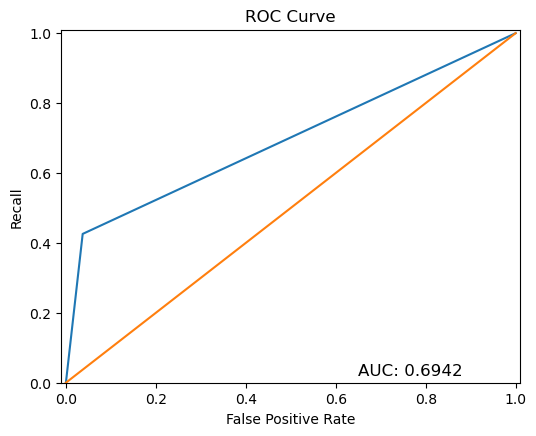

In [84]:
# Utilizamos nuestra función para crear el grafico plot_roc

fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_valid,
    predictions= predict_tree
)

fig.tight_layout(pad=3.0)
plt.show()

#### Bosque Aleatorio

In [85]:
param_grid = {
    'n_estimators':[4,6,8,10,12,14],
    'max_depth':[3,4,5,6,7,8,9,10,11]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state = 12345), param_grid=param_grid, cv=3, scoring='f1')

grid_search.fit(features_train, target_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_forest = best_model.predict(features_valid)

print(best_model)
print(best_params)
print(best_score)

RandomForestClassifier(max_depth=10, n_estimators=4, random_state=12345)
{'max_depth': 10, 'n_estimators': 4}
0.03104806934594169


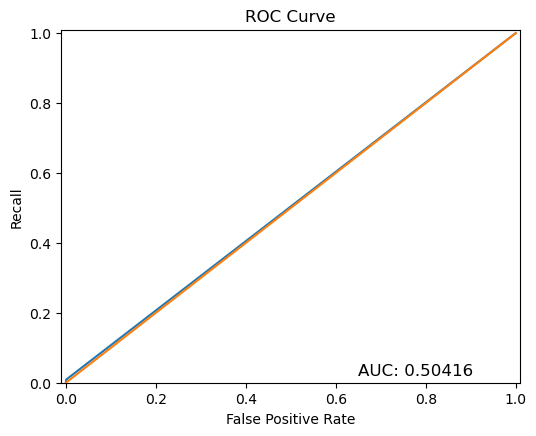

In [86]:
fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_valid,
    predictions= predict_forest
)

fig.tight_layout(pad=3.0)
plt.show()

#### Regresión Logística

In [87]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(solver = 'liblinear', max_iter = 5000), param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(features_train, target_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_lr = best_model.predict(features_valid)

print(best_model)
print(best_params)
print(best_score)

LogisticRegression(C=1, max_iter=5000, solver='liblinear')
{'C': 1, 'penalty': 'l2'}
0.31060085031384277


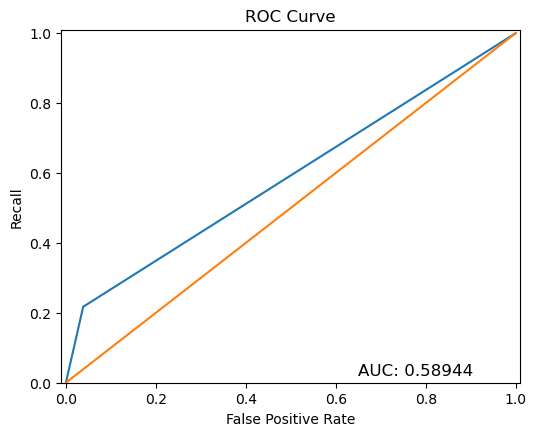

In [88]:
fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_valid,
    predictions= predict_lr
)

fig.tight_layout(pad=3.0)
plt.show()

**Conclusiones Primeros Modelos**
- Ninguno de los modelos logró alcanzar la meta de un f1 de al menos 0.59. 
- El modelo con la métrica más alta fue el modelo de árbol de decisión con un f1 de 0.565 y un AUC de 0.694.
- El modelo de bosque aleatorio obtuvo un f1 de 0.031 y un AUC de 0.504. Métricas bastante bajas. 
- El modelo de regresión logística obtuvo un f1 de 0.31 y un AUC de 0.589. 



### Modelos Ajustando Class_weight

#### Arbol de Decision

In [89]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8,9,10,11],
    'min_samples_split':[2,3,4]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state =12345,class_weight = 'balanced'), param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(features_train, target_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_tree = best_model.predict(features_valid)

print(best_model)
print(best_params)
print(best_score)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
0.5700206236369285


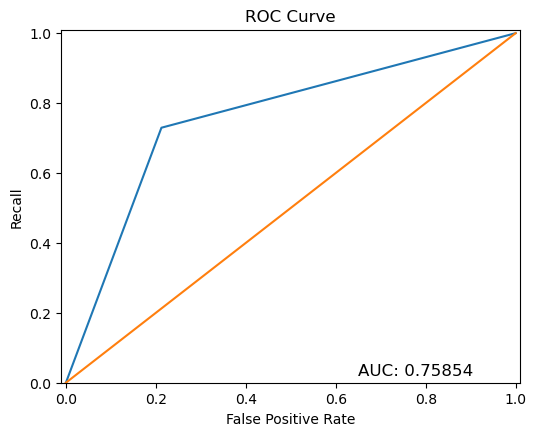

In [90]:
fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_valid,
    predictions= predict_tree
)

fig.tight_layout(pad=3.0)
plt.show()

#### Bosque Aleatorio

In [91]:
param_grid = {
    'n_estimators':[4,6,8,10,12],
    'max_depth':[3,4,5,6,7,8,9,10,11]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight = 'balanced',random_state = 12345), param_grid=param_grid, cv=3, scoring='f1')

grid_search.fit(features_train, target_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_forest = best_model.predict(features_valid)

print(best_model)
print(best_params)
print(best_score)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=12,
                       random_state=12345)
{'max_depth': 9, 'n_estimators': 12}
0.48796835239139796


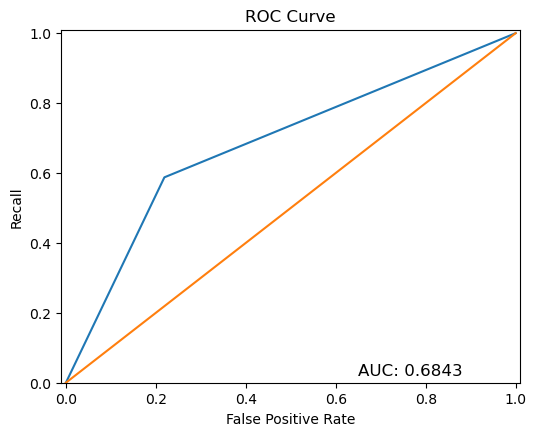

In [92]:
fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_valid,
    predictions= predict_forest
)

fig.tight_layout(pad=3.0)
plt.show()

#### Regresión Logística

In [93]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(
        class_weight = 'balanced', max_iter = 5000, solver = 'liblinear'), param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(features_train, target_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_lr = best_model.predict(features_valid)

print(best_model)
print(best_params)
print(best_score)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=5000, penalty='l1',
                   solver='liblinear')
{'C': 0.1, 'penalty': 'l1'}
0.4934393476278931


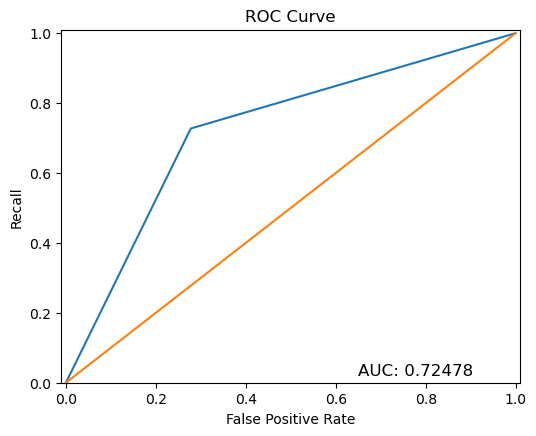

In [94]:
fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_valid,
    predictions= predict_lr
)

fig.tight_layout(pad=3.0)
plt.show()

**Conclusiones Modelos ajustando class_weight**

- Al Ajustar el hiperparametro class_weight vemos una mejora muy pequeña en el modelo de árbol decisión y una mejora un poco más - significativa en los otros dos modelos. Sin embargo, aún no conseguimos ningún modelo con un f1 de al menos 0.57. 
- El modelo de árbol de decisión obtuvimos un f1 de 0.57 y un AUC de 0.758.
- El modelo de bosque aleatorio obtuvimos un f1 de 0.487 y un AUC de 0.684.
- El modelo de regresión logística obtuvimos un f1 de 0.493 y un AUC de 0.72. 
- Podemos ver que nuevamente el mejor modelo es el de árbol de decisión. 


### Modelos - Sobremuestreo

In [49]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

#### Arbol de Decision

In [95]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8,9,10,11],
    'min_samples_split':[2,3,4]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state =12345), param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(features_upsampled, target_upsampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_tree = best_model.predict(features_valid)

print(best_model)
print(best_params)
print(best_score)

DecisionTreeClassifier(max_depth=11, random_state=12345)
{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 2}
0.9246921663275407


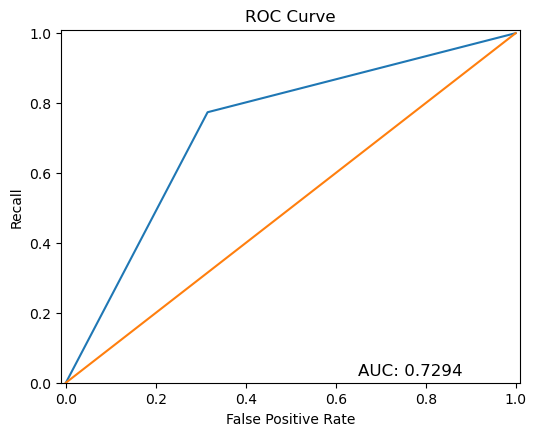

In [96]:
fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_valid,
    predictions= predict_tree
)

fig.tight_layout(pad=3.0)
plt.show()

#### Bosque Aleatorio

In [97]:
param_grid = {
    'n_estimators':[4,6,8,10,12],
    'max_depth':[3,4,5,6,7,8,9,10,11]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state = 12345), param_grid=param_grid, cv=3, scoring='f1')

grid_search.fit(features_upsampled, target_upsampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_forest = best_model.predict(features_valid)

print(best_model)
print(best_params)
print(best_score)

RandomForestClassifier(max_depth=11, n_estimators=4, random_state=12345)
{'max_depth': 11, 'n_estimators': 4}
0.8397175182914354


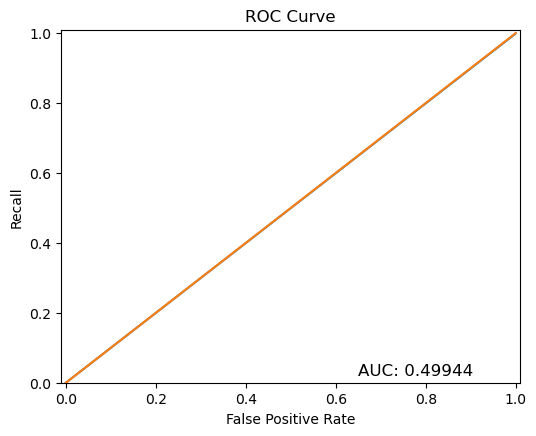

In [98]:
fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_valid,
    predictions= predict_forest
)

fig.tight_layout(pad=3.0)
plt.show()

#### Regresión Logística

In [99]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter = 5000, solver = 'liblinear'), param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(features_upsampled, target_upsampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_lr = best_model.predict(features_valid)

print(best_model)
print(best_params)
print(best_score)

LogisticRegression(C=10, max_iter=5000, penalty='l1', solver='liblinear')
{'C': 10, 'penalty': 'l1'}
0.9196199129484889


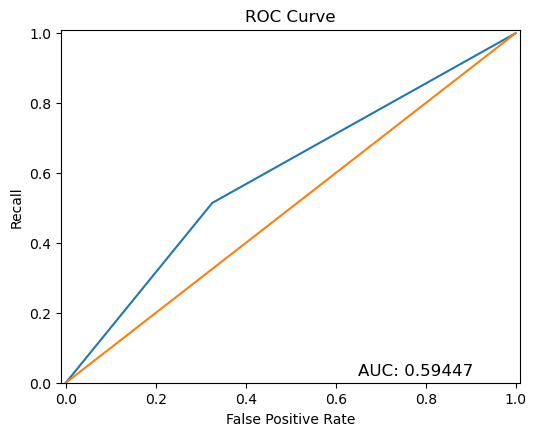

In [100]:
fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_valid,
    predictions= predict_lr
)

fig.tight_layout(pad=3.0)
plt.show()

**Conclusiones Modelos Aplicando Sobremuestreo**

- AL aplicar el método de sobremuestreo en nuestro conjunto de datos obtuvimos una mejora significa en todos los modelos. En este caso, todos los modelos alcanzaron métricas de f1 mayores a nuestra meta de 0.59. 
- El modelo de árbol de decisión obtuvo un f1 de 0.924 y un AUC de 0.729.
- El modelo de bosque aleatorio obtuvo un f1 de 0.839 y un AUC de 0.499. 
- El modelo de regresión logística obtuvo un f1 de 0.919 y un AUC de 0.594.
- Nuevamente vemos que el mejor modelo es el de árbol de decisión. 

### Modelos - Submuestreo


In [55]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

#### Árbol de Decisión

In [101]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8,9,10,11],
    'min_samples_split':[2,3,4]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state =12345), param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(features_downsampled, target_downsampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_tree = best_model.predict(features_valid)

print(best_model)
print(best_params)
print(best_score)

DecisionTreeClassifier(max_depth=4, random_state=12345)
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
0.8628869169396504


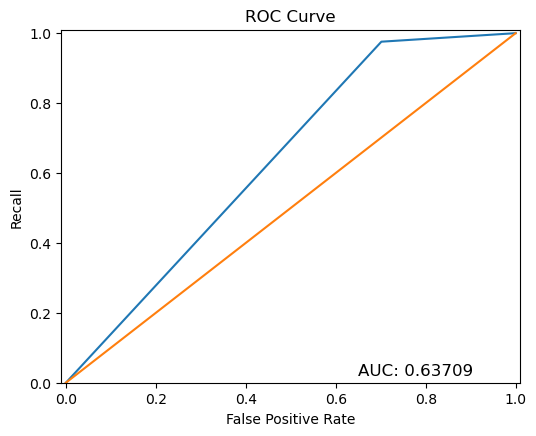

In [102]:
fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_valid,
    predictions= predict_tree
)

fig.tight_layout(pad=3.0)
plt.show()

#### Bosque Aleatorio

In [103]:
param_grid = {
    'n_estimators':[4,6,8,10,12],
    'max_depth':[3,4,5,6,7,8,9,10,11]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state = 12345), param_grid=param_grid, cv=3, scoring='f1')

grid_search.fit(features_downsampled, target_downsampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_forest = best_model.predict(features_valid)

print(best_model)
print(best_params)
print(best_score)

RandomForestClassifier(max_depth=11, n_estimators=8, random_state=12345)
{'max_depth': 11, 'n_estimators': 8}
0.8393661741622896


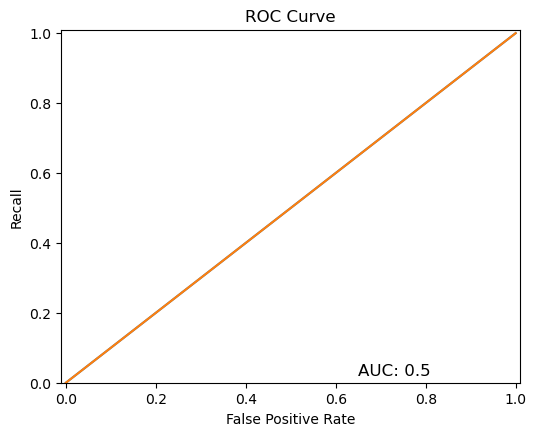

In [104]:
fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_valid,
    predictions= predict_forest
)

fig.tight_layout(pad=3.0)
plt.show()

#### Regresión Logística

In [105]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter = 5000, solver = 'liblinear'), param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(features_downsampled, target_downsampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = grid_search.best_estimator_
predict_lr = best_model.predict(features_valid)

print(best_model)
print(best_params)
print(best_score)

LogisticRegression(C=0.1, max_iter=5000, penalty='l1', solver='liblinear')
{'C': 0.1, 'penalty': 'l1'}
0.8476016266581086


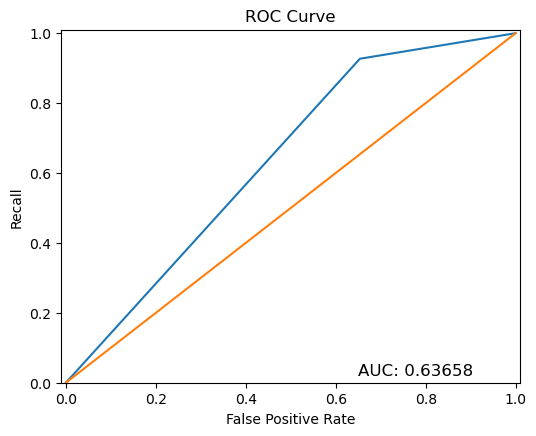

In [106]:
fig, ax = plt.subplots(figsize=(6, 5))

plot_roc(
    custom_axis= ax,
    y= target_valid,
    predictions= predict_lr
)

fig.tight_layout(pad=3.0)
plt.show()

**Conclusiones Modelos Aplicando Submuestreo**

- En este caso también obtuvimos métricas mayores a nuestros primeros dos modelos. Sin embargo, las métricas son menores que las que obtuvimos al aplicar el sobremuestro. Nuestras métricas en estos modelos también superaron la meta de un f1 de 0.59 en cada modelo. 
- El modelo árbol de decisión obtuvo un f1 de 0.862 y un AUC de 0.637.
- El modelo de bosque aleatorio obtuvo un f1 de 0.839 y un AUC de 0.5.
- El modelo de regresión logística obtuvo un f1 de 0.847 y un AUC de 0.636.
- Nuevamente vemos que las mejores métricas las obtuvo el modelo de árbol de decisión. 


**Conclusión General de todos los Modelos**

Después de generar varios modelos utilizando diferentes métodos de balanceo de características podemos ver que el mejor modelo es el de Árbol de decisión al utilizar el método de sobremuestro y utilizando los siguientes hiperparametros:

- Modelo: Arbol de Decision
- Método: Sobremuestreo
- Criterion: ‘gini’
- Max_depth: 11
- Random_state: 12345
- Min_samples_split: 2


## Conclusiones Generales

**Exploracion de datos**

- Tenemos un dataset con un total de 14 columnas y 1000 filas.
- El D-type de cada columna parece corresponder de manera correcta a los valores que contienen.
- Tenemos varias columnas numéricas y algunas categóricas. Esto significa que tendremos que codificar y estandarizar estos datos - para poder hacer nuestros modelos. 
- Tenemos valores nulos en la columna `Tenure`. Vamos a necesitar que arreglar este problema.

**Valores Ausentes**

- Decidimos eliminar los valores ausentes y trabajar con el resto del dataset.

**Outliers**

- Encontramos outliers en las columnas ` CreditScore ` y ` NumOfProducts`.
- La columna ` EstimatedSalary` no tiene outliers.
- Decidimos no tomar ninguna acción al respecto.

**Desbalanceo**

- Descubrimos que nuestro conjunto objetivo esta desbalanceado. 

**Primeros Modelos**

- Decidimos crear modelos sin hacer ninguna corrección adicional. 
- Ninguno de los modelos logró alcanzar la meta de un f1 de al menos 0.59. 
- El modelo con la métrica más alta fue el modelo de árbol de decisión con un f1 de 0.565 y un AUC de 0.694.
- El modelo de bosque aleatorio obtuvo un f1 de 0.031 y un AUC de 0.504. Métricas bastante bajas. 
- El modelo de regresión logística obtuvo un f1 de 0.31 y un AUC de 0.589. 

**Modelos Ajustando Class_weight**

- Ajustanmos class_weight usando 'balanced' en cada modelo.
- Al Ajustar el hiperparametro class_weight vemos una mejora muy pequeña en el modelo de árbol decisión y una mejora un poco más - significativa en los otros dos modelos. Sin embargo, aún no conseguimos ningún modelo con un f1 de al menos 0.57. 
- El modelo de árbol de decisión obtuvimos un f1 de 0.57 y un AUC de 0.758.
- El modelo de bosque aleatorio obtuvimos un f1 de 0.487 y un AUC de 0.684.
- El modelo de regresión logística obtuvimos un f1 de 0.493 y un AUC de 0.72. 
- Podemos ver que nuevamente el mejor modelo es el de árbol de decisión. 

**Modelos Aplicando Sobremuestro**

- AL aplicar el método de sobremuestreo en nuestro conjunto de datos obtuvimos una mejora significa en todos los modelos. En este caso, todos los modelos alcanzaron métricas de f1 mayores a nuestra meta de 0.59. 
- El modelo de árbol de decisión obtuvo un f1 de 0.924 y un AUC de 0.729.
- El modelo de bosque aleatorio obtuvo un f1 de 0.839 y un AUC de 0.499. 
- El modelo de regresión logística obtuvo un f1 de 0.919 y un AUC de 0.594.
- Nuevamente vemos que el mejor modelo es el de árbol de decisión. 

**Modelos Aplicando Submuestro**

- En este caso también obtuvimos métricas mayores a nuestros primeros dos modelos. Sin embargo, las métricas son menores que las que obtuvimos al aplicar el sobremuestro. Nuestras métricas en estos modelos también superaron la meta de un f1 de 0.59 en cada modelo. 
- El modelo árbol de decisión obtuvo un f1 de 0.862 y un AUC de 0.637.
- El modelo de bosque aleatorio obtuvo un f1 de 0.839 y un AUC de 0.5.
- El modelo de regresión logística obtuvo un f1 de 0.847 y un AUC de 0.636.
- Nuevamente vemos que las mejores métricas las obtuvo el modelo de árbol de decisión. 

**Mejor Modelo**

- Modelo: Arbol de Decision
- Método: Sobremuestreo
- Criterion: ‘gini’
- Max_depth: 11
- Random_state: 12345
- Min_samples_split: 2
